## 0. 파이썬 모듈/함수를 공부하는 방법
- 공식 문서
- 내부 docs 확인

In [ ]:
# 내부 docs 확인 - 인터넷 연결이 안 될 때 특정 함수에 대한 설명을 볼 수 있음

import numpy as np
dir(np)
help(np.mean)

## 1. 중심경향치와 산포도

### Q1) numpy 기술통계와 소수점 표현
- 내장함수 help()와 dir()를 이용하거나 docs를 이용해서 다음 기술통계를 소수점 셋째자리까지 작성하기.
- 소수점자리는 f-string 문법을 이용해 표기하기 (참고:[f-string](https://blockdmask.tistory.com/429))
- 평균(_mean), 중앙값(_median), 분산(_var), 표준편차(_std) (참고 [numpy docs - mean](https://numpy.org/doc/stable/reference/generated/numpy.mean.html)

In [27]:
import numpy as np
data = [10, 20, 20, 30, 40]

In [29]:
#코드작성
_mean = np.mean(data)
_median = np.median(data)
_var = np.var(data)
_std = np.std(data)
print(_std)  # 부동소수점 이슈

# 1. 반올림
print(_std.round(3))
# 2. f-string
print(f'{_std:.3f}')  # {변수명:.nf}

10.198039027185569
10.198
10.198


In [8]:
print(f'평균은 {_mean:.3f}')
print(f'중앙값은 {_median:.3f}')
print(f'분산은 {_var:.3f}')
print(f'표준편차는 {_std:.3f}')

평균은 24.000
중앙값은 20.000
분산은 104.000
표준편차는 10.198


### Q2) 커플통장: 산술평균과 조화평균
- 커플통장의 예시를 가지고 산술평균과 조화평균의 지표로서의 차이를 비교

- 남성의 접속률이 정해져있을 때 여성의 접속률이 늘어남에 따라 산술평균과 조화평균의 지표가 다르게 행동한다는 것을 보여준다

In [9]:
import matplotlib.pyplot as plt
import numpy as np

male_rate = 2
female_rate = np.linspace(0, 100, 500)
# np.linspace(시작값, 끝값, 갯수)
# 지정된 범위 내에서 균일한 간격으로 일정 개수의 값을 생성하여 배열 생성
# -> x축 값을 일정한 비율로 나누어 주게 됨

matplotlib

1. 입력 값 정하기
2. plot 그리기
3. plot 구성 요소

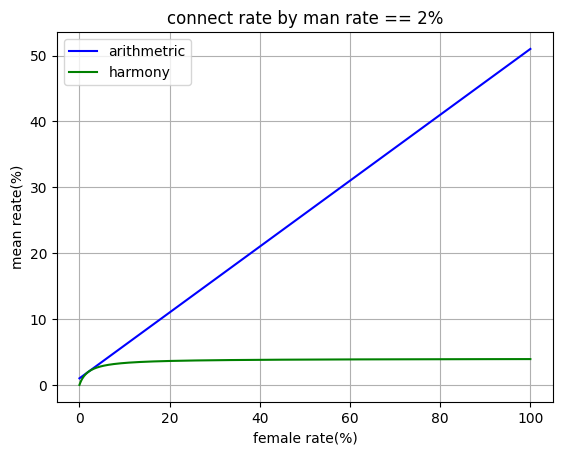

In [13]:
# 코드작성

# 데이터 생성
# 브로드 캐스팅: 서로 다른 모양(shape)의 배열도 일정 조건을 만족하면 연산 가능
arithmetic_mean_fixed = (male_rate + female_rate) / 2
harmonic_mean_fixed = (2 * male_rate * female_rate) / (male_rate + female_rate)

# 그림 그리기
plt.plot(female_rate, arithmetic_mean_fixed, label="arithmetric", color="blue")
plt.plot(female_rate, harmonic_mean_fixed, label="harmony", color="green")

# 3. 옵션 설정하기
plt.xlabel("female rate(%)")
plt.ylabel("mean reate(%)")
plt.title("connect rate by man rate == 2%")
plt.legend()  # 범례 설정
plt.grid(True)
plt.show()

### Q3) 산포도: 표준편차와 변동계수

- 두 회사의 6일간 주가데이터가 수집하였습니다. Numpy와 Pandas를 각각 변동계수를 구해봅시다.
- 변동계수: 표준편차 / 평균 * 100

In [14]:
# Numpy 방법

import numpy as np
com_a = [76300, 77400, 77900, 77200, 76900, 78800]
com_b = [6400, 7000, 7400, 6900, 7300, 7600]

In [31]:
# Numpy 방법
# Numpy는 기본적으로 자유도를 1 이라고 생각한다 (모수)

mean_a_np = np.mean(com_a)
mean_b_np = np.mean(com_b)

std_a_np = np.std(com_a, ddof=1)
std_b_np = np.std(com_b, ddof=1)

cv_a_np = std_a_np / mean_a_np
cv_b_np = std_b_np / mean_b_np

print(f'A회사의 변동계수 {cv_a_np:.3f}')
print(f'B회사의 변동계수 {cv_b_np:.3f}')

A회사의 변동계수 0.011
B회사의 변동계수 0.060


In [20]:
# Pandas 방법

import pandas as pd
data = pd.DataFrame({'Company A': com_a, 'Company B': com_b})

In [21]:
# Pandas 방법
# Pands는 기본적으로 자유도를 0 이라고 생각한다 (표본)

mean_a_pd = data['Company A'].mean()
mean_b_pd = data['Company B'].mean()

std_a_pd = data['Company A'].std()
std_b_pd = data['Company B'].std()

cv_a_pd = std_a_pd / mean_a_pd
cv_b_pd = std_b_pd / mean_b_pd

print(f'A회사의 변동계수 {cv_a_pd:.3f}')
print(f'B회사의 변동계수 {cv_b_pd:.3f}')

A회사의 변동계수 0.011
B회사의 변동계수 0.060


### Q4) 산포도: boxplot
- 최대-최소 범위, 사분위수(IQR)을 구하고 boxplot시각화를 해봅시다.

In [22]:
data = [10, 12, 23, 23, 16, 23, 21, 16, 7, 9]

최대최소범위 16.000
iqr 12.000


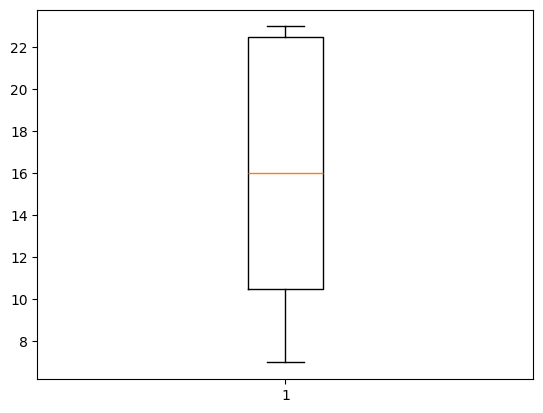

In [23]:
# 코드 작성

data_range = np.max(data) - np.min(data)
iqr = np.percentile(data, 75) - np.percentile(data, 25)
# percentile = np.percentile(data, Q값)

print(f'최대최소범위 {data_range:.3f}')
print(f'iqr {iqr:.3f}')

import matplotlib.pyplot as plt
plt.boxplot(data)  #  iqr 등의 값을 제공하지 않아 직접 계산해야 한다
plt.show()

## 2. 데이터 시각화
- tips 데이터를 이용한 데이터 시각화

### Q5) 통계분석 실습 문제

1. total_bill의 기본 통계량(평균, 중앙값, 분산, 표준편차)을 계산하시오.


In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
tips = sns.load_dataset('tips')
display(tips.head(3))
display(tips.describe(include = 'all'))

# display(): 한 블럭에서 여러 개를 출력 가능

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


In [60]:
# 코드

_mean = tips['total_bill'].mean()
_median = tips['total_bill'].median()
_variance = tips['total_bill'].var()
_std_dev = tips['total_bill'].std()

print(f"Mean: {_mean:.3f}, Median: {_median:.3f}, Variance: {_variance:.3f}, Std Dev: {_std_dev:.3f}")

Mean: 19.786, Median: 17.795, Variance: 79.253, Std Dev: 8.902


2. 요일별 팁의 평균 비교
문제: 요일(day)별 팁(tip)의 평균을 계산하고, 가장 팁이 많이 주어진 요일을 구하시오.

In [34]:
# 코드

tips.groupby('day')['tip'].mean().round(3)

<ipython-input-34-f5b5a31acdfd>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby('day')["tip"].mean().round(3)


,tip
day,
Thur,2.771
Fri,2.735
Sat,2.993
Sun,3.255


3. 흡연자와 비흡연자(smoker)의 total_bill 평균과 표준편차를 비교하시오.

In [61]:
# 코드

tips.groupby('smoker')['total_bill'].agg(['mean', 'std']).round(2)

<ipython-input-61-3110c3374624>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby('smoker')['total_bill'].agg(['mean', 'std']).round(2)


,mean,std
smoker,,
Yes,20.76,9.83
No,19.19,8.26


4. 성별(sex)과 흡연 여부(smoker)에 따라 평균 팁이 어떻게 달라지는지 확인하시오.

In [37]:
# 코드

tips.groupby(['sex', 'smoker'])['tip'].mean()

<ipython-input-37-b05a422cc6a9>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby(['sex', 'smoker'])['tip'].mean()


sex     smoker
Male    Yes       3.051167
        No        3.113402
Female  Yes       2.931515
        No        2.773519
Name: tip, dtype: float64

5. 요일별 총 total_bill의 합계를 계산하고, 어떤 요일에 가장 많은 매출이 발생했는지 확인하시오.

In [38]:
#코드

tips.groupby('day')['total_bill'].sum()

<ipython-input-38-7c6b8e143fa2>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby('day')['total_bill'].sum()


,total_bill
day,
Thur,1096.33
Fri,325.88
Sat,1778.40
Sun,1627.16


### Q6) 시각화

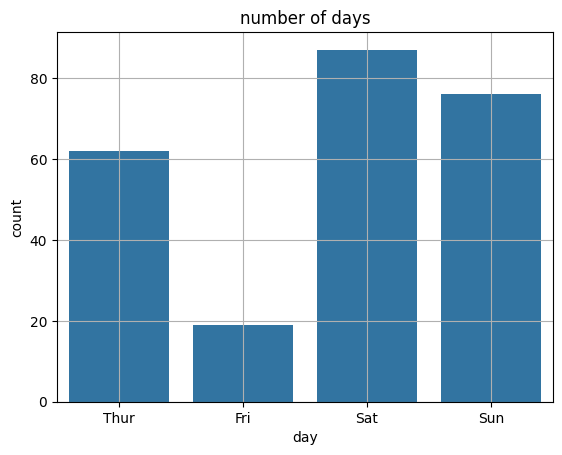

In [64]:
# countplot: x축 범주형, y축 관측치

sns.countplot(data=tips, x='day')

plt.title('number of days')
plt.grid(True)
plt.show()

<Axes: xlabel='sex', ylabel='tip'>

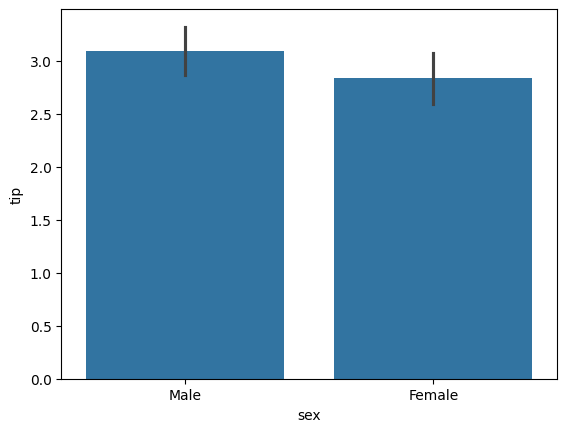

In [42]:
# barplot: X축이 범주형, Y축이 연속형 값

sns.barplot(data=tips, x='sex', y='tip', estimator='mean')
# estimator 기본값: mean

<Axes: xlabel='time', ylabel='total_bill'>

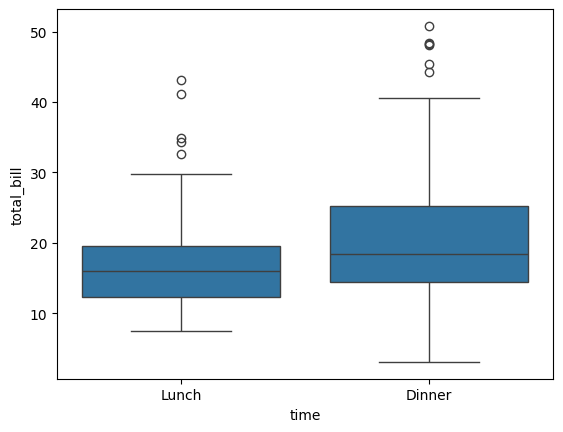

In [43]:
# boxplot: X축이 범주형, Y축이 수치형

sns.boxplot(data=tips, x='time', y='total_bill')

<Axes: xlabel='total_bill', ylabel='Count'>

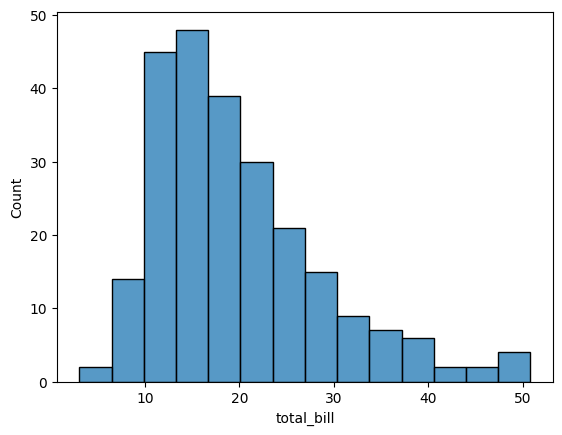

In [46]:
# histplot: X축 수치형, Y축 자료의 빈도수

sns.histplot(data=tips, x='total_bill')

<Axes: xlabel='total_bill', ylabel='tip'>

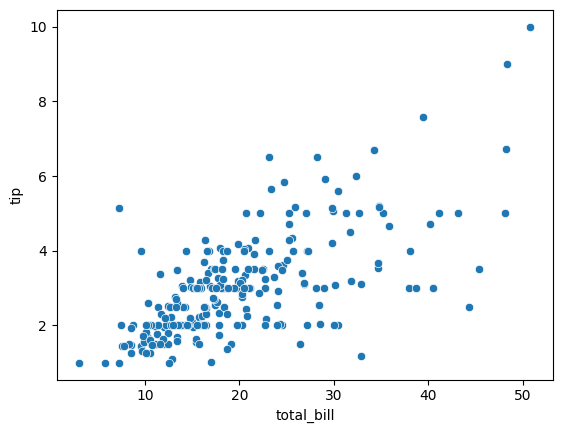

In [47]:
# scatterplot X축 수치형, Y축 수치형

sns.scatterplot(data=tips, x='total_bill', y='tip')

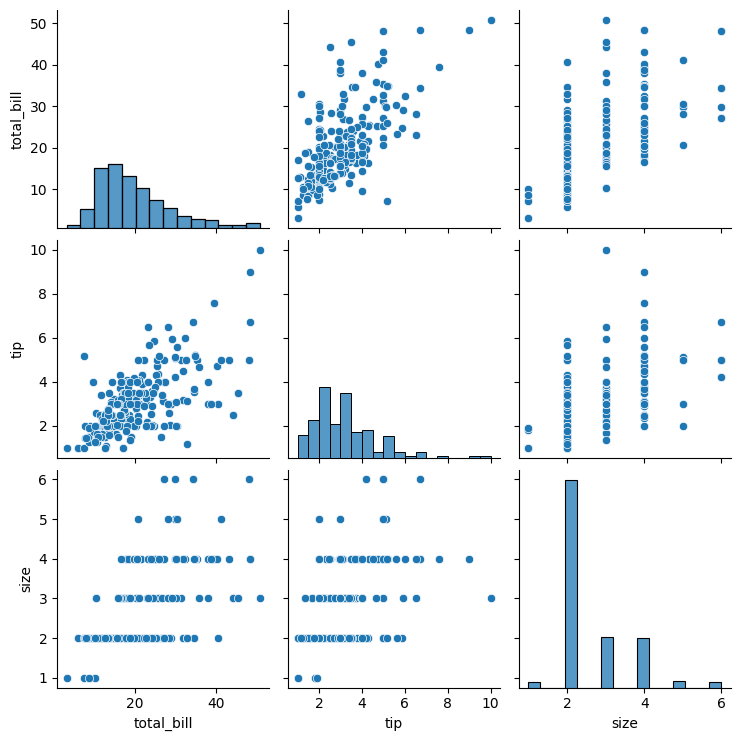

In [49]:
# pairplot: X,Y축 모두 수치형

sns.pairplot(data=tips)

## Numpy.random
- 다음은 Numpy.random모듈을 학습하기위한 문제입니다.
- 출력 결과를 재현하기 위한 코드를 작성해보세요
- Numpy docs 혹은 블로그를 참고하기 바라며 LLM 서비스는 자제해주세요

### Q7) 균등분포에서 난수 생성
- 0과 1사이의 실수 난수 100개를 생성하고 평균과 표준편차를 소수점 3번째짜리 까지 계산

In [50]:
# 난수 생성, 평균과 표준편차 계산

data = np.random.rand(100)

_mean = np.mean(data)
_std_dev = np.std(data)

print(f"Mean: {_mean:.3f}")
print(f"Standard Deviation: {_std_dev:.3f}")

Mean: 0.527
Standard Deviation: 0.276


### Q8) 주사위 시뮬레이션
- 주사위를 100번 던졌을때 나올 숫자를 시뮬레이션하고 각 숫자가 나온 횟수를 계산

Dice roll counts: {1: 14, 2: 17, 3: 18, 4: 16, 5: 19, 6: 16}


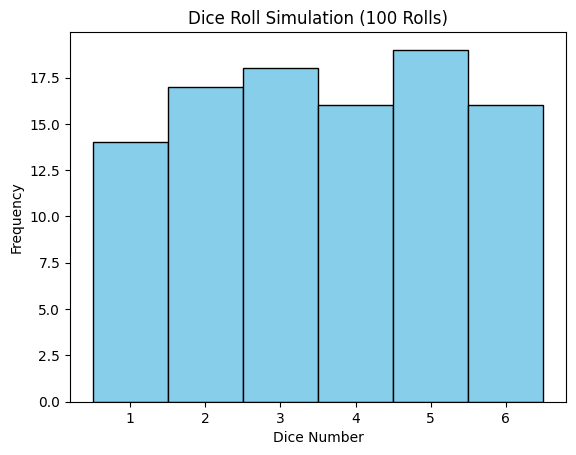

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# 1. 주사위 던지기 시뮬레이션
rolls = []

for i in range(100):
    roll = np.random.randint(1, 7)
    rolls.append(roll)

# 2. 각 숫자의 빈도 계산
roll_counts = {}

for i in range(1, 7):
    roll_counts[i] = rolls.count(i)


# 3. 결과 출력
print("Dice roll counts:", roll_counts)

# 4. 히스토그램 그리기
plt.hist(rolls, bins=np.arange(1, 8) - 0.5, color='skyblue', edgecolor='black')
plt.title("Dice Roll Simulation (100 Rolls)")
plt.xlabel("Dice Number")
plt.ylabel("Frequency")
plt.xticks(range(1, 7))  # X축에 1부터 6까지 숫자를 표시
plt.show()

### Q9) 정규분포 데이터 생성

- 평균 50, 표준편차 10인 정규분포에서 1,000개의 데이터를 생성하고 히스토그램 그리기

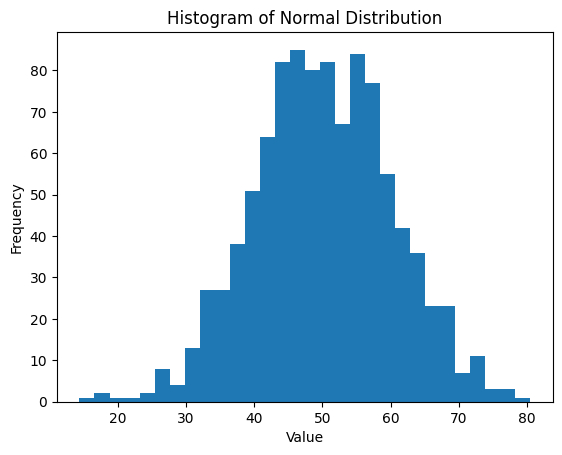

In [58]:
import matplotlib.pyplot as plt

# 정규분포 데이터 생성
# normal: NumPy에서 제공하는 정규분포 함수
#       : normal(loc=평균, scale=표준편차, size=데이터 개수)
data = np.random.normal(loc=50, scale=10, size=1000)

# 히스토그램 그리기
plt.hist(data, bins=30)
plt.title("Histogram of Normal Distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

hist() 파라미터

- x: 히스토그램을 그릴 데이터  
- bins: 히스토그램을 그릴 때 구간(bin)의 개수  
- range: 히스토그램을 그릴 데이터의 범위  
- density: 히스토그램의 y축 값을 빈도 수 대신
- 확률 밀도로 표시할지 여부  
- cumulative: 누적 히스토그램을 그릴지 여부  
- color: 히스토그램의 색상  
- alpha: 히스토그램의 투명도(0~1)  
- edgecolor: 히스토그램 막대기의 테두리 색상  
- linewidth: 히스토그램 막대기의 테두리 선의 두께  
- histtype: 히스토그램 막대기의 모양. bar는 일반 막대기 모양, step은 계단식 모양, stepfilled는 채워진 계단식 모양

### Q10) 로또 생성기 만들기

#### Part1: 단 1번의 추출
- 기능1: 1부터 45사이의 숫자 중 6개의 번호를 중복없이 추출(힌트 np.random.choice)
- 기능2: 추가적으로 보너스 번호 1개를 추출
-  로또 번호 풀: `lotto_pool`
-  로또 번호 6개 담는 자료형 `lotto_numbers`
-  보너스 번호 자료형 `bonus_numbers`

In [83]:
import numpy as np

# 로또 번호 생성
# 1부터 45 사이의 숫자 중 6개의 번호를 무작위로 추첨
lotto_pool = list(range(1, 46))
lotto_numbers = np.random.choice(lotto_pool, size=6, replace=False)

# 보너스 번호 생성 (이미 선택된 번호를 제외하고 추첨)
bonus_numbers = []

for i in lotto_pool:
    if i not in lotto_numbers:
        bonus_numbers.append(i)

bonus_number = np.random.choice(bonus_numbers, size=1, replace=False)

# 결과 출력
print("당첨 번호:", sorted(lotto_numbers.tolist()))
print("보너스 번호:", bonus_number[0])

# np.random.choice()가 선택한 숫자들을 Numpy의 데이터 타입(np.int64)로 반환한다.
# -> 고성능 수치 계산을 위해 자체 정수 타입 (np.int64, np.float64 등)을 사용

당첨 번호: [4, 21, 22, 25, 28, 33]
보너스 번호: 29


#### Part2: 1000회 반복 수행했을때 히스토그램으로시각화
- 입력할 세트 수 (ex 1000개): `n_tickets `
-  로또 번호 6개 담는 자료형 `lotto_numbers`

In [84]:
# 사용자 입력
n_tickets = int(input("몇 세트의 로또 번호를 생성하시겠습니까? "))

# 여러 세트의 로또 번호 생성
for i in range(n_tickets):
    # 로또 번호 추첨
    lotto_numbers = np.random.choice(lotto_pool, size=6, replace=False)

    # 보너스 번호 추첨
    bonus_numbers = []
    for i in lotto_pool:
        if i not in lotto_numbers:
            bonus_numbers.append(i)

    bonus_number = np.random.choice(bonus_numbers, size=1, replace=False)

    # 결과 출력
    print(f"세트 {i+1}: 당첨 번호={sorted(lotto_numbers.tolist())}, 보너스 번호={bonus_number[0]}")

몇 세트의 로또 번호를 생성하시겠습니까? 10
세트 46: 당첨 번호=[1, 12, 23, 25, 30, 40], 보너스 번호=36
세트 46: 당첨 번호=[11, 33, 35, 42, 43, 45], 보너스 번호=30
세트 46: 당첨 번호=[9, 16, 27, 31, 33, 42], 보너스 번호=12
세트 46: 당첨 번호=[6, 23, 26, 29, 34, 39], 보너스 번호=32
세트 46: 당첨 번호=[2, 5, 17, 19, 32, 36], 보너스 번호=9
세트 46: 당첨 번호=[12, 18, 32, 33, 35, 38], 보너스 번호=8
세트 46: 당첨 번호=[3, 11, 17, 29, 40, 45], 보너스 번호=20
세트 46: 당첨 번호=[2, 11, 12, 20, 24, 40], 보너스 번호=4
세트 46: 당첨 번호=[1, 2, 6, 25, 33, 44], 보너스 번호=38
세트 46: 당첨 번호=[15, 19, 21, 30, 38, 45], 보너스 번호=44


#### Part3 사용자의 로또 구매 횟수(ex 1000회)를 전달 받아 여러번의 로또번호 생성하는 코드 작성
- 로또 번호 생성함수명: `generate_lotto_numbers`
- 로또 번호 6개 담는 자료형 `lotto_numbers`
- 모든 로또번호를 담는 자료형 `all_numbers`

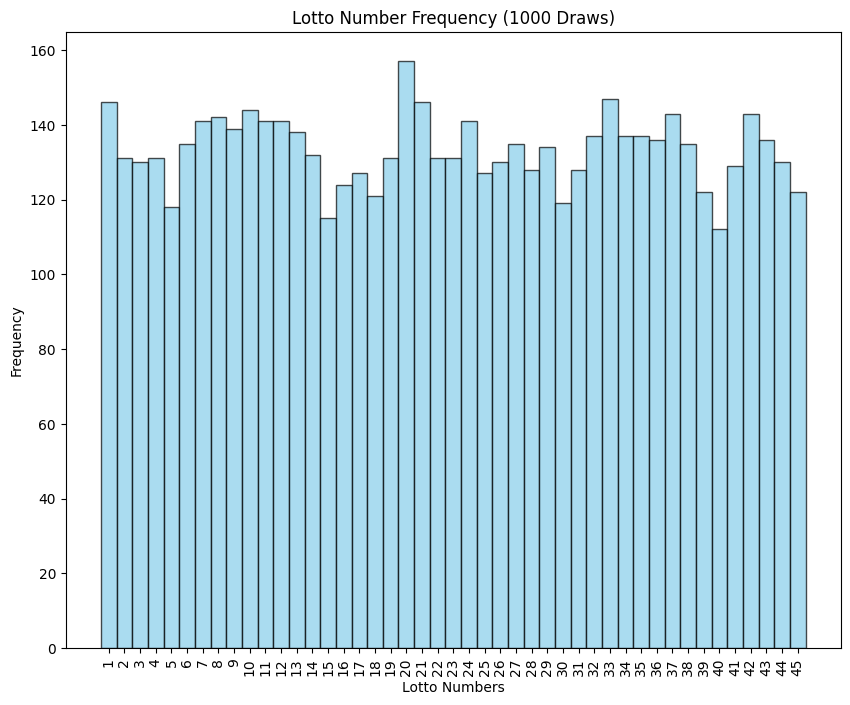

In [85]:
# 로또 번호 생성 함수
def generate_lotto_numbers():
    # 1부터 45까지의 숫자 풀
    lotto_pool = list(range(1, 46))

    # 6개의 번호 추첨
    lotto_numbers = np.random.choice(lotto_pool, size=6, replace=False)
    return lotto_numbers

# 빈도 분석용 데이터 생성
n_trials = 1000  # 로또 번호를 생성할 횟수

all_numbers = []

for i in range(n_trials):
    lotto_numbers = generate_lotto_numbers()
    for num in lotto_numbers:
        all_numbers.append(num)

# 히스토그램 시각화
plt.figure(figsize = (10,8))
plt.hist(all_numbers, bins=range(1, 47), align='left', color='skyblue', alpha=0.7, edgecolor='black')
plt.title("Lotto Number Frequency (1000 Draws)")
plt.xlabel("Lotto Numbers")
plt.ylabel("Frequency")
plt.xticks(rotation = 90)
plt.xticks(range(1, 46))  # 1부터 45까지의 숫자
plt.show()